In [1]:
import matplotlib
matplotlib.use("macosx")
import matplotlib.pyplot as plt
import sys
sys.path.append("/Users/lls/Documents/mlhalos_code/")
import pynbody
import numpy as np
from mlhalos import parameters
from mlhalos import distinct_colours
%matplotlib inline

In [167]:
def get_fraction_FPs_vs_overdensity(FPs_ids_density, Fps_ids_den_and_shear, halo_number, initial_overdensity, 
                                    f=None, h=None, ids_all=None, num_overdensities = 11):
    pynbody.analysis.halo.center(f[h[halo_number].properties['mostboundID']], vel=False)
    f.wrap()
    pynbody.analysis.halo.center(h[halo_number], vel=False)

    r_initial = pynbody.analysis.halo.virial_radius(h[halo_number], overden=overden_first)
    overden_initial = overden_first

    r_FPs_den = f[FPs_ids_density]['r']
    r_FPs_den_ell = f[Fps_ids_den_and_shear]['r']
    n_den = len(np.where(r_FPs_den <= r_initial)[0])
    n_den_shear = len(np.where(r_FPs_den_ell <= r_initial)[0])

    # new
    r_all = f[ids_all]['r']
    n_all = len(np.where(r_all <= r_initial)[0])
    
    overden = [overden_initial]
    density_fraction = [n_den/n_all]
    den_shear_fraction = [n_den_shear/n_all]

    den_mean = f.properties["omegaM0"] * pynbody.analysis.cosmology.rho_crit(f, z=0)
    
    for i in range(num_overdensities - 1):
        r_2 = r_initial * 1.8
        
        mass = f[pynbody.filt.Sphere(r_2)]['mass'].sum()
        V = (4/3)*np.pi*(r_2**3)
        density = mass / V
        overden_2 = density/den_mean
        overden.append(overden_2)

        n_all = len(np.where(r_all <= r_2)[0])
        num_FPs_den = len(np.where(r_FPs_den <= r_2)[0])
        density_fraction.append(num_FPs_den/n_all)
        num_FPs_den_ell = len(np.where(r_FPs_den_ell <= r_2)[0])
        den_shear_fraction.append(num_FPs_den_ell/n_all)

        r_initial = r_2
    
    return np.array(overden), np.array(density_fraction), np.array(den_shear_fraction)

## False positives that do not belong to halos

### Do they live close to halos? Very close to the virial radius/in filaments or in voids?

In [2]:
path = "/Users/lls/Documents/CODE/stored_files/shear/classification/"
ids_tested = np.load(path + "tested_ids.npy")

ic = parameters.InitialConditionsParameters(path="/Users/lls/Documents/CODE/")
f = ic.final_snapshot
f.physical_units("kpc")
h = ic.halo

Fps_ids_den = np.load("/Users/lls/Desktop/Fps_th_28_den.npy")
Fps_ids_den_shear = np.load("/Users/lls/Desktop/Fps_th_28_den_den_sub_ell.npy")

In [194]:
high_mass = np.arange(0, 7)
# mid_mass = np.random.choice(np.arange(7, 78), 20)
mid_mass = np.arange(7, 78)
small_mass = np.random.choice(np.arange(78, 400), 100)

In [195]:
# halos = [0, 10, 50, 100, 210, 300, 390]
# halos = [150, 200 , 250, 300, 350]
halos = mid_mass
num_overdensities = 11

In [196]:
# c = distinct_colours.get_distinct(2)

overden_all = np.zeros((len(halos), num_overdensities))
n_tot_all_den = np.zeros((len(halos), num_overdensities))
n_tot_all_den_shear = np.zeros((len(halos), num_overdensities))
halo_mass = np.zeros((len(halos), ))

for j in range(len(halos)):
    halo_number = halos[j]
    print("Doing halo " + str(halo_number) + " -number " + str(j))
    halo_mass[j] = "%.3g" % h[halo_number]['mass'].sum()
    overden_first = 200
    
    overden_all[j], n_tot_all_den[j], n_tot_all_den_shear[j] = get_fraction_FPs_vs_overdensity(Fps_ids_den, 
                                                                                               Fps_ids_den_shear, 
                                                                                               halo_number, overden_first, 
                                                                                               f=f, h=h, ids_all=ids_tested, 
                                                                                               num_overdensities = 11)
    print("Done halo " + str(j))

Doing halo 7 -number 0
Done halo 0
Doing halo 8 -number 1
Done halo 1
Doing halo 9 -number 2
Done halo 2
Doing halo 10 -number 3
Done halo 3
Doing halo 11 -number 4
Done halo 4
Doing halo 12 -number 5
Done halo 5
Doing halo 13 -number 6
Done halo 6
Doing halo 14 -number 7
Done halo 7
Doing halo 15 -number 8
Done halo 8
Doing halo 16 -number 9
Done halo 9
Doing halo 17 -number 10
Done halo 10
Doing halo 18 -number 11
Done halo 11
Doing halo 19 -number 12
Done halo 12
Doing halo 20 -number 13
Done halo 13
Doing halo 21 -number 14
Done halo 14
Doing halo 22 -number 15
Done halo 15
Doing halo 23 -number 16
Done halo 16
Doing halo 24 -number 17
Done halo 17
Doing halo 25 -number 18
Done halo 18
Doing halo 26 -number 19
Done halo 19
Doing halo 27 -number 20
Done halo 20
Doing halo 28 -number 21
Done halo 21
Doing halo 29 -number 22
Done halo 22
Doing halo 30 -number 23
Done halo 23
Doing halo 31 -number 24
Done halo 24
Doing halo 32 -number 25
Done halo 25
Doing halo 33 -number 26
Done halo 

In [133]:
c = distinct_colours.get_distinct(2)

In [ ]:
overden_all

In [197]:
np.save("/Users/lls/Desktop/FPs_shear/threshold_28/FPs_in_no_halo_around_mid_mass_halos/overden_all_71_halos.npy", overden_all)
np.save("/Users/lls/Desktop/FPs_shear/threshold_28/FPs_in_no_halo_around_mid_mass_halos/n_tot_all_den_71_halos.npy", n_tot_all_den)
np.save("/Users/lls/Desktop/FPs_shear/threshold_28/FPs_in_no_halo_around_mid_mass_halos/n_tot_all_den_shear_71_halos.npy", n_tot_all_den_shear)

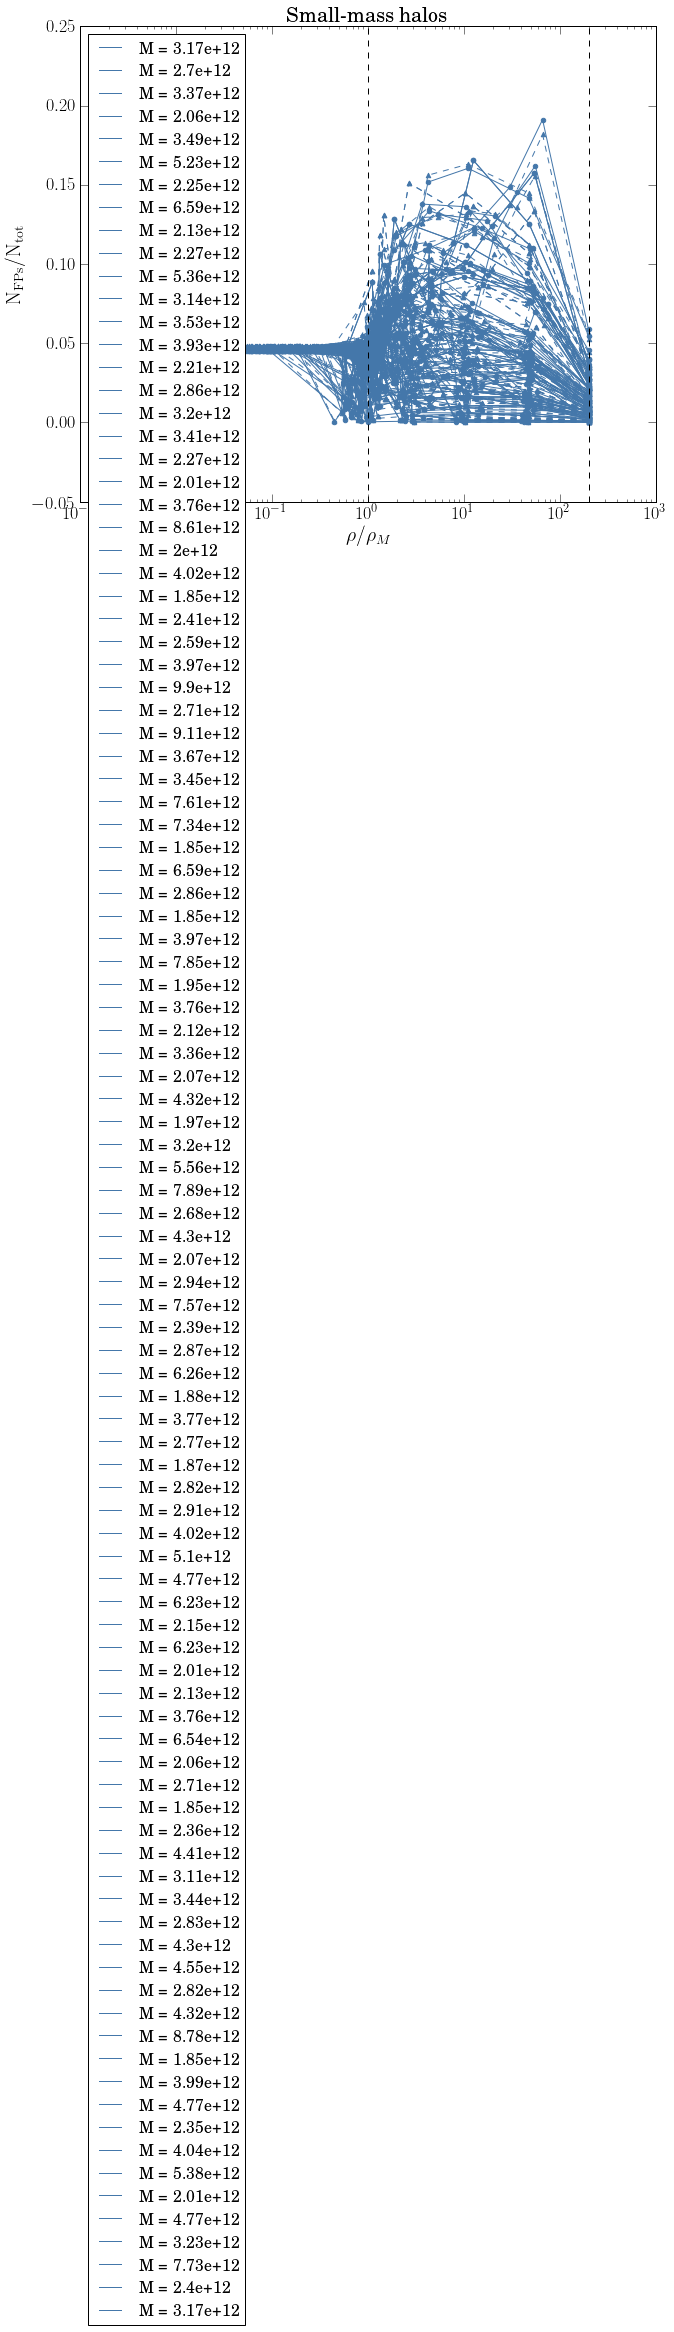

In [171]:
plt.figure(figsize=(10,8))

for i in range(len(halos)):
    ind_i = np.argsort(overden_all[i])[::-1]

    plt.plot(overden_all[i, ind_i], n_tot_all_den[i][ind_i], color=c[0], ls="--")
    plt.scatter(overden_all[i, ind_i], n_tot_all_den[i][ind_i], color=c[0], s=20, marker="^")
    
    plt.plot(overden_all[i][ind_i], n_tot_all_den_shear[i][ind_i], color=c[0], label="M = " + str(halo_mass[i]))
    plt.scatter(overden_all[i][ind_i], n_tot_all_den_shear[i][ind_i], color=c[0], s=20)

plt.legend(loc="best", fontsize=16)
plt.xlabel(r"$\rho / \rho_M$")
plt.ylabel(r"$\mathrm{N_{FPs}} / \mathrm{N_{tot}}$")
# plt.ylabel(r"$\mathrm{N_{FPs}} / \sum{\mathrm{N_{FPs}}}$")
# plt.xscale("symlog")
plt.xscale("log")

plt.axvline(x=200, ls="--", color="k")
plt.axvline(x=1, ls="--", color="k")
plt.title("Mid-mass halos")

# plt.savefig("/Users/lls/Desktop/FPs_shear/threshold_28/FPs_in_no_halo_around_high_mass_halos/Fps_den_vs_den_shear.pdf")

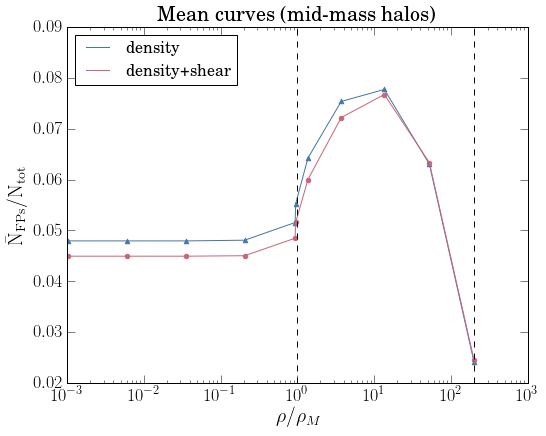

In [199]:
# mean curve
median_den = np.mean(n_tot_all_den, axis=0)
median_den_shear = np.mean(n_tot_all_den_shear, axis=0)

ind_i = np.argsort(overden_all[0])[::-1]

plt.figure(figsize=(8,6))
plt.plot(overden_all[0, ind_i], median_den[ind_i], color=c[0], ls="-", label="density")
plt.scatter(overden_all[0, ind_i], median_den[ind_i], color=c[0], s=20, marker="^")

plt.plot(overden_all[0, ind_i], median_den_shear[ind_i], color=c[1], label="density+shear")
plt.scatter(overden_all[0, ind_i], median_den_shear[ind_i], color=c[1], s=20)

plt.legend(loc="best", fontsize=16)
plt.xlabel(r"$\rho / \rho_M$")
plt.ylabel(r"$\mathrm{\bar{N}_{FPs}} / \mathrm{N_{tot}}$")
# plt.ylabel(r"$\mathrm{N_{FPs}} / \sum{\mathrm{N_{FPs}}}$")
# plt.xscale("symlog")
plt.xscale("log")

plt.axvline(x=200, ls="--", color="k")
plt.axvline(x=1, ls="--", color="k")
plt.title("Mean curves (mid-mass halos)")

plt.savefig("/Users/lls/Desktop/FPs_shear/threshold_28/FPs_in_no_halo_around_mid_mass_halos/Fps_mean_all_71_halos.pdf")

In [180]:
ind_i = np.argsort(overden_all[0])[::-1]

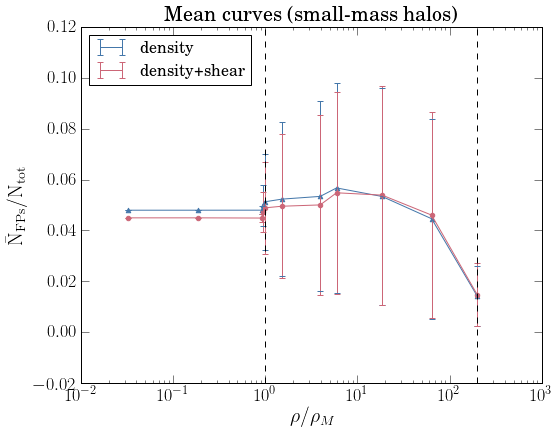

In [193]:
std_den = np.std(n_tot_all_den, axis=0)
std_den_shear = np.std(n_tot_all_den_shear, axis=0)

plt.figure(figsize=(8,6))
#plt.plot(overden_all[0, ind_i], median_den[ind_i], color=c[0], ls="-", label="density")
plt.errorbar(overden_all[0, ind_i], median_den[ind_i], color=c[0], ls="-", yerr=std_den[ind_i], label="density")
plt.scatter(overden_all[0, ind_i], median_den[ind_i], color=c[0], s=20, marker="^")

plt.errorbar(overden_all[0, ind_i], median_den_shear[ind_i], color=c[1], yerr=std_den_shear[ind_i], label="density+shear")
plt.scatter(overden_all[0, ind_i], median_den_shear[ind_i], color=c[1], s=20)

plt.legend(loc="best", fontsize=16)
plt.xlabel(r"$\rho / \rho_M$")
plt.ylabel(r"$\mathrm{\bar{N}_{FPs}} / \mathrm{N_{tot}}$")
# plt.ylabel(r"$\mathrm{N_{FPs}} / \sum{\mathrm{N_{FPs}}}$")
# plt.xscale("symlog")
plt.xscale("log")

plt.axvline(x=200, ls="--", color="k")
plt.axvline(x=1, ls="--", color="k")
plt.title("Mean curves (small-mass halos)")

In [186]:
diff = n_tot_all_den - n_tot_all_den_shear

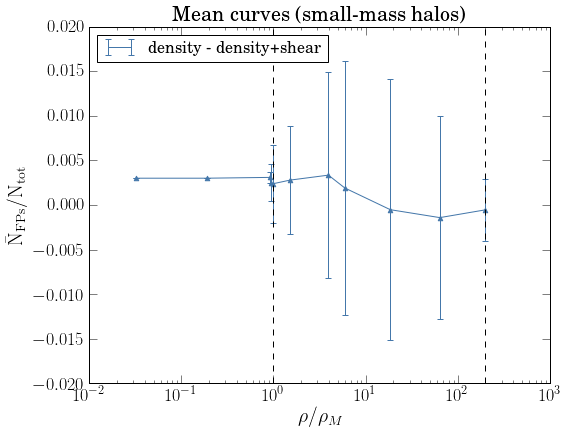

In [189]:
med_diff =  np.mean(diff, axis=0)
std_diff = np.std(diff, axis=0)


plt.figure(figsize=(8,6))
#plt.plot(overden_all[0, ind_i], median_den[ind_i], color=c[0], ls="-", label="density")
plt.errorbar(overden_all[0, ind_i], med_diff[ind_i], color=c[0], ls="-", yerr=std_diff[ind_i], label="density - density+shear")
plt.scatter(overden_all[0, ind_i], med_diff[ind_i], color=c[0], s=20, marker="^")

plt.legend(loc="best", fontsize=16)
plt.xlabel(r"$\rho / \rho_M$")
plt.ylabel(r"$\mathrm{\bar{N}_{FPs}} / \mathrm{N_{tot}}$")
# plt.ylabel(r"$\mathrm{N_{FPs}} / \sum{\mathrm{N_{FPs}}}$")
# plt.xscale("symlog")
plt.xscale("log")

plt.axvline(x=200, ls="--", color="k")
plt.axvline(x=1, ls="--", color="k")
plt.title("Mean curves (small-mass halos)")

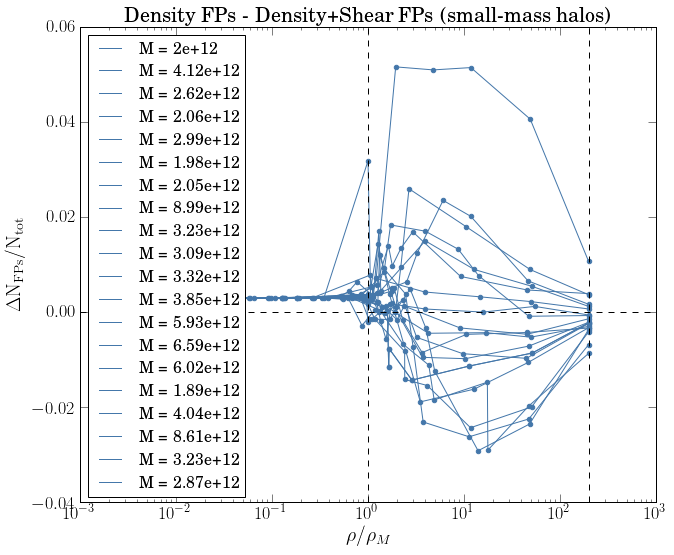

In [146]:
plt.figure(figsize=(10,8))
for i in range(len(halos)):
    ind = np.argsort(overden_all[i])[::-1]
    diff = n_tot_all_den[i][ind]- n_tot_all_den_shear[i][ind]
    
    plt.plot(overden_all[i][ind], diff, color=c[0], label="M = " + str(halo_mass[i]))
    plt.scatter(overden_all[i][ind], diff, color=c[0], s=20)

plt.axhline(y=0, color="k", ls="--")
plt.legend(loc="best", fontsize=16)
plt.xlabel(r"$\rho / \rho_M$")
plt.ylabel(r"$\Delta \mathrm{N_{FPs}} / \mathrm{N_{tot}}$")
# plt.ylabel(r"$\mathrm{N_{FPs}} / \sum{\mathrm{N_{FPs}}}$")
# plt.xscale("symlog")
plt.xscale("log")
plt.title("Density FPs - Density+Shear FPs (small-mass halos)")

plt.axvline(x=200, ls="--", color="k")
plt.axvline(x=1, ls="--", color="k")

# plt.savefig("/Users/lls/Desktop/FPs_shear/threshold_28/FPs_in_no_halo_around_high_mass_halos/Fps_diff.pdf")

In [ ]:
#     plt.plot(overden_all[i][ind_i], n_tot_all[i][ind_i]/np.sum(n_tot_all[i][ind_i]), color=c[i], label="halo " + str(
#         halos[i]))
#     plt.plot(overden_all[i][ind_i], n_tot_all_den[i][ind_i]/np.sum(n_tot_all[i][ind_i]), color=c[i], ls="--")
#     plt.scatter(overden_all[i][ind_i], n_tot_all_den[i][ind_i]/np.sum(n_tot_all[i][ind_i]), color=c[i], s=20, marker="^")
    
#     plt.plot(overden_all[i][ind_i], n_tot_all_den_shear[i][ind_i]/np.sum(n_tot_all[i][ind_i]), color=c[i], label=str(halo_mass[i]))
#     plt.scatter(overden_all[i][ind_i], n_tot_all_den_shear[i][ind_i]/np.sum(n_tot_all[i][ind_i]), color=c[i], s=20)
# n, b = np.histogram(overden_all[0], 10)
#
# for k in range(len(b) - 1):
#
#     for i in range(len(b) - 1):
#         ind = (overden_all >= b[i]) & (overden_all < b[i + 1])
#         print(overden_all[ind])
#         ov[i] = np.median(overden_all[ind])
#
#
# medians = np.median(n_tot_all[overden_all[:,]])
#
# plt.scatter(overden[ind], n_tot[ind]/np.sum(n_tot), color=col, s=20, label="halo " + str(halo_number))